<a href="https://colab.research.google.com/github/pankajti/wqu/blob/main/MScFE_610_FINANCIAL_ECONOMETRICS_Group_769_Work_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!python -m pip install yfinance
from IPython.display import clear_output
clear_output(wait=False)


## Modelling Randomnness

### Definition

Modelling randomness is a way to explain the random variation with help of some parameters. Usually we have some probability associated with random events and this probability distribution is unknown to us. We observed some sample outcomes from the random evets and try to find some parameters and models which most likely explain the sample data. 

### Description
While modelling randomness we follow some steps to get a model annd model parameters from the sample data so that we can generate data from model as if they are coming from the actual population. We cann think of using all the data from population to generate model ad parameters but usually its impractical or impossbile to do so therefore we rely on sample data. 

### Demonstration

We 'll use asset return data to demonstrate modelly random returns. Usually we the asset returns are ormally distributed. We'll use yahoo finance api to doenload Treasure 10 year bill data from 2016 and calculate return. 
Usually the returns are normally  distributed. We are going to show how normal distriution model fits our asset returnn data. 

In [76]:
import pandas as pd
import numpy as np 
import statsmodels
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt 
import yfinance as yf 
import datetime as dt
import pylab


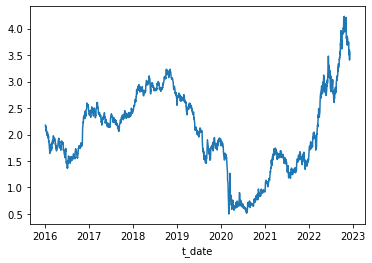

In [77]:
import yfinance as yf 

ticker= yf.Ticker('^TNX') 
ticker_hist = ticker.history(start='2016-01-05', ed= '2022-01-01')
ticker_hist['t_date'] = list(map(lambda x: x.date() , ticker_hist.index))
ticker_hist= ticker_hist.set_index('t_date')
ticker_hist['stock_ret'] = ticker_hist.Close.pct_change() 
ticker_hist['log_ret'] = np.log(ticker_hist.Close) - np.log(ticker_hist.Close.shift(1))
ticker_hist=ticker_hist.dropna()
ticker_hist.Close.plot()


### Diagram

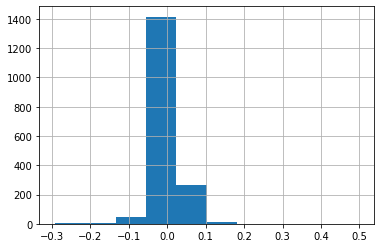

In [78]:
ticker_hist['stock_ret'].hist()

As We cann see the returns are centred around zero and there is a peak around mean but need to run some formal tests to make sure that they are normally distribbuted. We ar going to do normality tests and use qqplots. 

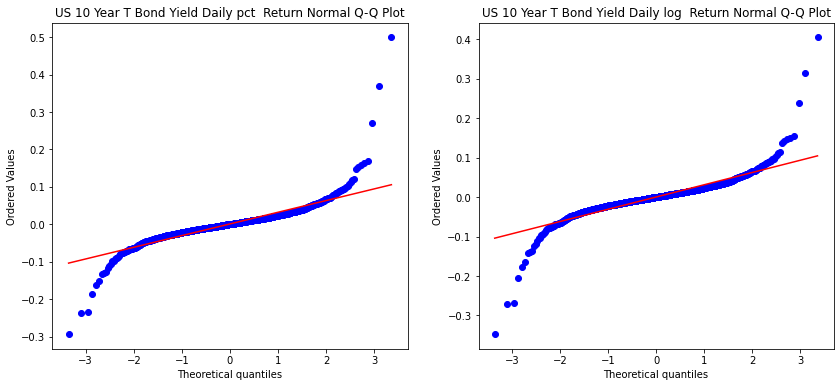

In [79]:
# Normal QQ plots
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
stats.probplot(ticker_hist['stock_ret'], dist="norm", plot=pylab)
plt.title("US 10 Year T Bond Yield Daily pct  Return Normal Q-Q Plot")

ax2 = plt.subplot(122)
stats.probplot(ticker_hist['log_ret'], dist="norm", plot=pylab)
plt.title("US 10 Year T Bond Yield Daily log  Return Normal Q-Q Plot")
pylab.show()

### Diagnosis

We can check the test reults and model attributes along with confidence interval tests to come up with a conclusion if the model is a good fit to our sample data. 

###  Damage

We'll have some damage in case of the model not being a fit to the actual population. One well known problem in case of normal distribution is that of fat tails where some extreme results are observed more often than predicted by the model. 

### Direction

While modelling randomness using normal distributions we need to make sure some of the assumptions of the normality are followed. We sometimes do some trannsformations of the data to make them alignned to the normally distributed data. 

## Heteroskadasticity 

### Definition

Heteroskedaticity is a situation where standard deviation of residuals of a model is  not connstant. The residual values tennd to spread. While plotted with the predicted  values they tend to spread out inn the graph indicatinng a non constant   

### Description

### Demonstration

We are goig to use energy consumption data and fit AR model to get predictions and residulas. The heteroskedaticity will be aparant in the output data

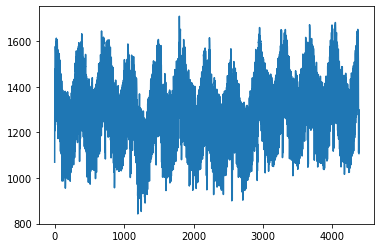

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Load and plot the time-series data
#
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")
data = df['Consumption']
#data= ticker_hist['log_ret']
data.plot()

P-value:  4.7440549018425884e-08


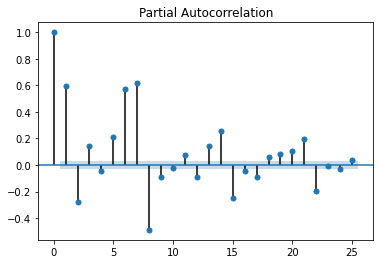

In [81]:

# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(data, autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data, lags=25)

In [103]:

#
# Create training and test data
#
train_data = data[:len(data)-100]
test_data = data[len(data)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=8).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Mon, 12 Dec 2022   AIC                              8.503
Time:                        07:16:39   BIC                              8.518
Sample:                             8   HQIC                             8.509
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [83]:
ar_model.resid

2        -2.144453
3        52.814220
4        78.989092
5        -5.642323
6       -47.564754
           ...    
4278    205.703063
4279    -25.005590
4280     54.546553
4281     30.770915
4282     30.217110
Length: 4281, dtype: float64

In [84]:
pred

4283    1361.847604
4284    1337.642509
4285    1330.433801
4286    1331.762375
4287    1334.782031
           ...     
4378    1336.808698
4379    1336.808698
4380    1336.808698
4381    1336.808698
4382    1336.808698
Length: 100, dtype: float64

In [104]:
pred = ar_model.predict(start=len(train_data), end=(len(data)-1), dynamic=False)


In [105]:
pred

4283    1199.580761
4284    1132.051688
4285    1392.772651
4286    1425.877770
4287    1424.606502
           ...     
4378    1355.220188
4379    1359.014426
4380    1334.516355
4381    1299.851112
4382    1309.602440
Length: 100, dtype: float64

In [106]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(pred, (pred-test_data.values).reset_index())


In [107]:
bp_test

(99.22078039065156,
 2.2586458923718322e-23,
 6239.342774249756,
 4.9128531885027094e-104)

In [108]:
pred-test_data.values

4283      8.477311
4284     16.978808
4285    -26.819059
4286    -19.528290
4287    -26.401418
           ...    
4378     91.279278
4379     59.150446
4380     39.428825
4381     84.402142
4382    202.487560
Length: 100, dtype: float64

### Diagram

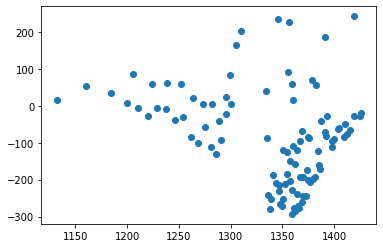

In [109]:
plt.scatter( pred , pred-test_data)


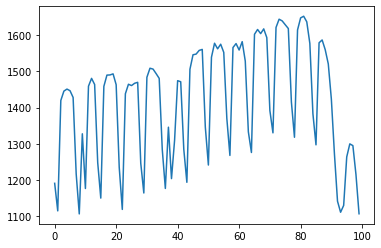

In [110]:
plt.plot(test_data.values)


### Diagnosis

We can see the scatter plot for residual and predicted values and figure out if there is a constant standard derivation among the residuals. We can also perform some test like bP test or white test to figure out if there is a heterodisticity present in the model. 



### Damage

Non constant standard deviation viaolates an assumption for linear regress. If heteroskedasticity is present then we cann't perform linear regression on the given data. 

### Direction

To model data correctly we need to handle heteroscadisticity issue of the model either by changing model parameters or by using a new model with more suitable structures. 



## **AUTOCORRELATION**



### **Definition**
**Autocorrelation** is a function that gives a correlation between a data set and itself at various delays (lags). There are numerous uses for this in statistics and signal processing. In stock market, this sort of regressive analysis is used to estimate future prices within a given confidence interval (usually 95%), and it compares current prices to prior ones.

Autocorrelation is calculated using the following function:
$$ R_{XX}(t_1,t_2)=E[X_{t_1}\bar{X{t_2}}] $$

*Where $t_1,t_2$ are the times between which the correlation is calculated, $X_t$ a random process, and $E$ the expected value operator.*

Autocorrelation's coefficient is given by the following function:
The properties of this test coefficient are:
$$ \rho_{XX}(t_1,t_2)=\frac{E[(X_{t_1}-\mu_{t_1}) + \overline{(X_{t_2}-\mu_{t_2})}]}{\sigma_{t_1}\sigma_{t_2}} $$

*Where $t_1,t_2$ are the times between which the correlation is calculated, $X_t$ a random process, $t_1,t_2$ are the covariances, $E$ the expected value operator and $ \rho_{XX} $ the auto-correlation coefficient which is between 1 and -1;*




### **Description**
**Autocorrelation** also called serial correlation is a calculated value that represents how similar a value within a time series is to a prior value.
Autocorrelation can be used to identify data patterns and the impact of previously recorded values on a current observation. It has numerous applications, the most notable of which include signal processing, weather forecasting, and securities research.


### **Demonstration**
We can use a simple set of data to demonstrate the problem. We will go through an example of calculating autocorrelation in Python.

In [92]:
#define data
x = [22, 24, 25, 25, 28, 29, 34, 37, 40, 44, 51, 48, 47, 50, 51]

Calculate the autocorrelation:

1) Using lagged variables at different time steps

In [93]:
import statsmodels.api as sm

# extracting only the values
values = pd.DataFrame(x)
 
# using shift function to shift the values.
dataframe = pd.concat([values.shift(3), values.shift(2),
                       values.shift(1), values], axis=1)
# naming the columns
dataframe.columns = ['t', 't+1', 't+2', 't+3']
 
# using corr() function to compute the correlation
result = dataframe.corr()
 
print(result)

            t       t+1       t+2       t+3
t    1.000000  0.962781  0.926109  0.901460
t+1  0.962781  1.000000  0.967451  0.935356
t+2  0.926109  0.967451  1.000000  0.971469
t+3  0.901460  0.935356  0.971469  1.000000


2) using acf function

In [94]:
print(sm.tsa.acf(x))

[ 1.          0.83174224  0.65632458  0.49105012  0.27863962  0.03102625
 -0.16527446 -0.30369928 -0.40095465 -0.45823389 -0.45047733 -0.36933174
 -0.29057279 -0.22494033 -0.12529833]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


### **Diagram**
Autocorrelation diagram for a time series by using the plot_acf() function

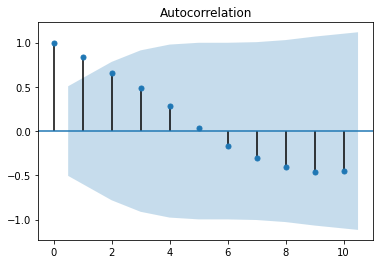

In [95]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(x, lags=10)
plt.show()

The x-axis shows the number of delays, while the y-axis shows the autocorrelation at those lags. By default, the plot begins at lag = 0, and the autocorrelation is always 1.

### **Diagnosis**
Autocorrelation is a powerful method for finding periodicity, and other less obvious forms of effect. There is no such thing as a perfect forecasting technique, and autocorrelation is no exception. The Durbin-Watson statistic is the conventional test for the presence of first-order autocorrelation.



### **Damage**
Too Much Retained Knowledge is one of the limit of autocorrelation.
Data in signal processing frequently exhibits small changes or artifacts created during observation. Speech-pattern recognition, radio-frequency analysis, and x-ray analysis all generate enormous volumes of noise.



### **Directions**
There are different approaches to solve autocorrelation problems.
There are two strategies for reducing autocorrelation, the first of which is the most important:
1.   Improve the model's fit. In the model, try to capture structure in the data.
2.   Include an AR1 model if no additional predictors can be added. 



## *References*
*   https://en.wikipedia.org/wiki/Autocorrelation#Serial_dependence
*   https://www.educative.io/answers/what-is-autocorrelation-in-python
*   https://vitalflux.com/autoregressive-ar-models-with-python-examples/
*   https://dtkaplan.github.io/SM2-bookdown/modeling-randomness.html